# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
# 1. Import Library
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np  # Untuk operasi numerik
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk pembagian data dan pencarian hyperparameter
from sklearn.ensemble import RandomForestClassifier  # Algoritma Random Forest untuk klasifikasi
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix  # Evaluasi model
import seaborn as sns  # Untuk visualisasi statistik
import matplotlib.pyplot as plt  # Untuk membuat plot


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [6]:
# Memuat Dataset dari Hasil Clustering
df = pd.read_csv('Dataset_inisiasi.csv')  
# Membaca dataset dari file CSV 'Dataset_inisiasi.csv'
# Pastikan file ini sudah ada dan berisi kolom 'Cluster'

# Melakukan One-Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['provinsi', 'jenis', 'daerah', 'periode', 'tahun_kategori'])

# Pisahkan fitur (X) dan label (y) setelah encoding
X = df_encoded.drop(columns=['cluster'])  # Fitur
y = df_encoded['cluster']                # Label

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Data Splitting (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membagi dataset menjadi data latih dan data uji dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian
# random_state=42 memastikan hasil pembagian yang konsisten setiap kali kode dijalankan

# Konfirmasi ukuran dataset setelah pembagian
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
# Menampilkan jumlah sampel dalam data latih dan data uji untuk memastikan pembagian yang benar

Jumlah data latih: 4360
Jumlah data uji: 1091


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Membuat dan Melatih Model
model = RandomForestClassifier(random_state=42)
# Membuat model RandomForestClassifier dengan random_state=42 untuk hasil yang konsisten

model.fit(X_train, y_train)
# Melatih model menggunakan data latih (X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model Klasifikasi (Sebelum Tuning):
Accuracy: 0.9963336388634281
F1 Score: 0.9963335750411323

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       375
           1       0.99      0.99      0.99       333
           2       0.99      1.00      1.00       383

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091



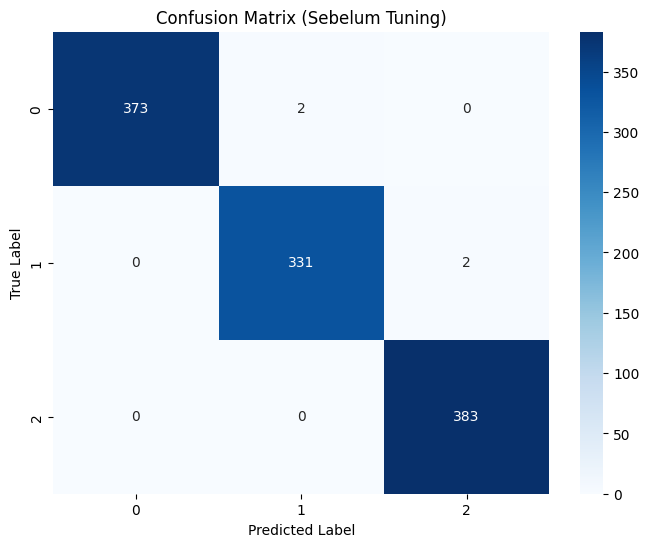

In [9]:
# Prediksi hasil model terhadap data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model berdasarkan hasil prediksi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung skor F1 dengan metode pembobotan 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi model sebelum tuning
print("\nEvaluasi Model Klasifikasi (Sebelum Tuning):")
print("Accuracy:", accuracy)  # Menampilkan akurasi model
print("F1 Score:", f1)  # Menampilkan skor F1
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Menampilkan laporan klasifikasi

# Membuat plot matriks kebingungan untuk memvisualisasikan performa model
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure plot
sns.heatmap(
    confusion_matrix(y_test, y_pred),  # Matriks kebingungan berdasarkan data aktual dan prediksi
    annot=True,  # Menampilkan nilai dalam sel matriks
    fmt='d',  # Format nilai sebagai bilangan bulat
    cmap='Blues'  # Skema warna 'Blues' untuk heatmap
)
plt.title("Confusion Matrix (Sebelum Tuning)")  # Menambahkan judul pada plot
plt.xlabel("Predicted Label")  # Memberikan label sumbu X
plt.ylabel("True Label")  # Memberikan label sumbu Y
plt.show()  # Menampilkan plot


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
# Mendefinisikan parameter grid untuk hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon dalam Random Forest
    'max_depth': [None, 5, 10],  # Kedalaman maksimum pohon. None berarti tidak terbatas
    'min_samples_split': [2, 4, 6]  # Jumlah minimum sampel untuk memecah simpul internal
}

# Inisialisasi GridSearchCV untuk pencarian hyperparameter terbaik
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Model Random Forest dengan seed random untuk hasil yang konsisten
    param_grid=param_grid,  # Grid parameter yang didefinisikan
    cv=5,  # Validasi silang sebanyak 5 lipatan
    scoring='accuracy',  # Metrik evaluasi menggunakan akurasi
    n_jobs=-1  # Menggunakan semua prosesor yang tersedia untuk efisiensi
)

# Melatih model menggunakan dataset pelatihan dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik berdasarkan hasil pencarian
print("\nBest Hyperparameters:", grid_search.best_params_)

# Mengambil model terbaik berdasarkan hyperparameter yang dioptimalkan
best_model = grid_search.best_estimator_



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 0.997250229147571
F1 Score: 0.9972499367285304

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      0.99      1.00       333
           2       0.99      1.00      1.00       383

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091



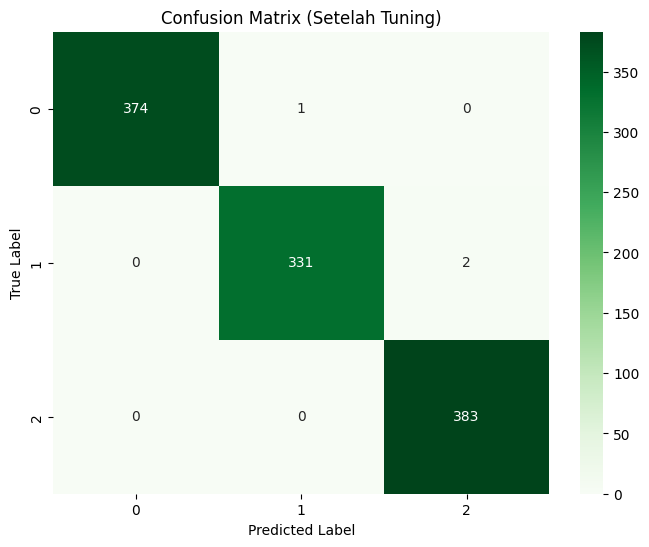

In [11]:
# Melakukan prediksi dengan model terbaik (setelah tuning hyperparameter)
y_pred_tuned = best_model.predict(X_test)

# Menghitung akurasi model dengan prediksi yang telah dilakukan
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Menghitung skor F1 menggunakan metode pembobotan 'weighted'
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

# Menampilkan hasil evaluasi model setelah tuning
print("\nEvaluasi Model Klasifikasi (Setelah Tuning):")
print("Accuracy:", accuracy_tuned)  # Menampilkan akurasi setelah tuning
print("F1 Score:", f1_tuned)  # Menampilkan skor F1 setelah tuning
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))  # Laporan metrik evaluasi

# Membuat visualisasi matriks kebingungan setelah tuning
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
sns.heatmap(
    confusion_matrix(y_test, y_pred_tuned),  # Matriks kebingungan dari prediksi model terbaik
    annot=True,  # Menampilkan angka pada sel matriks
    fmt='d',  # Format angka dalam matriks adalah bilangan bulat
    cmap='Greens'  # Skema warna hijau untuk heatmap
)
plt.title("Confusion Matrix (Setelah Tuning)")  # Memberikan judul pada plot
plt.xlabel("Predicted Label")  # Label untuk sumbu X
plt.ylabel("True Label")  # Label untuk sumbu Y
plt.show()  # Menampilkan plot heatmap


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Perbandingan sebelum dan sesudah tuning:
  - Accuracy sebelum tuning: 0.9963 vs sesudah tuning: 0.9972
  - F1 Score sebelum tuning: 0.9963 vs sesudah tuning: 0.9972
2. Analisis Detail:
  Periksa classification report untuk melihat kelas dengan performa rendah.
  Jika terdapat kelas dengan precision atau recall rendah, pertimbangkan:
  - Mengumpulkan data tambahan untuk kelas tersebut
  - Mencoba algoritma lain atau melakukan feature engineering lebih lanjut
  - Menggunakan teknik resampling untuk mengatasi ketidakseimbangan kelas (jika ada)
3. Rekomendasi Tindakan Lanjutan.
  Jika hasil belum memuaskan, Anda dapat mencoba:
  - Mencoba algoritma klasifikasi lain seperti SVM, Decision Tree, atau KNN
  - Melakukan tuning lebih lanjut pada hyperparameter
  - Melakukan feature engineering atau menambah data untuk meningkatkan performa model